# (Airline on-time Performance Data)
## by (Ahmed Mohamed)

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

### structure of the dataset?

> This dataset cosnsits of 9882798 observation and 29 column

### main feature(s) of interest in your dataset?

> Checking the delay during time 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> columns: ArrDelay, ArrTime, CRSArrTime, Cancelled, Year, Month, DayofMonth, DayOfWeek, Dest

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook

import pygal   #pip3 install pygal   #should install these modules to avoid errors
                #pip3 install cairosvg

import time, IPython
import urllib
import requests
import os
import zipfile

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
act_df = pd.read_csv('modified_airline.csv')

In [6]:
# a shortcut for figure info 
def fig_info(xlabl, title,fsize = 12, x_fsize = 10):
    plt.xlabel(xlabl, fontsize= x_fsize)
    plt.title(title, fontsize= fsize)

#bar plot for categoricl data
def cat_bar(data, x, hue, order_by):
    sns.countplot(data = data, x = x, hue = hue, order = data[order_by].value_counts().index[:10]);

> **In the next figure**: DL airline carrier achevied first place for recorded trips 

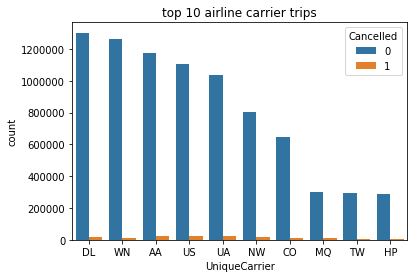

In [7]:
#airline carrier trips
fig_info('Carrier ID', 'top 10 airline carrier trips')
cat_bar(act_df, 'UniqueCarrier', 'Cancelled', 'UniqueCarrier')

> **In the next figure**: ORD airport achevied first place for recorded trips 

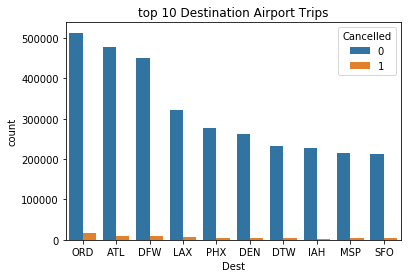

In [8]:
#airport trips
fig_info('Destination Airport ID', 'top 10 Destination Airport Trips')
cat_bar(act_df, 'Dest', 'Cancelled', 'Dest')

> **From the next figure**: Most values are 0, which means most trips arrived on time

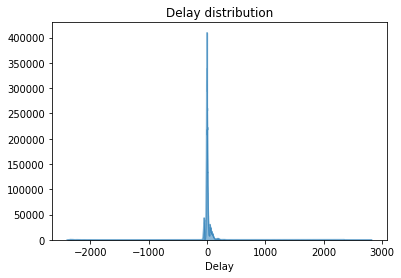

In [9]:
fig_info('Delay', 'Delay distribution')
act_df['ArrDelay'].value_counts().sort_index().plot.area(stacked=False)
plt.show()

> **In the next figure**: From 1995 to 1999 recorded more delays through years

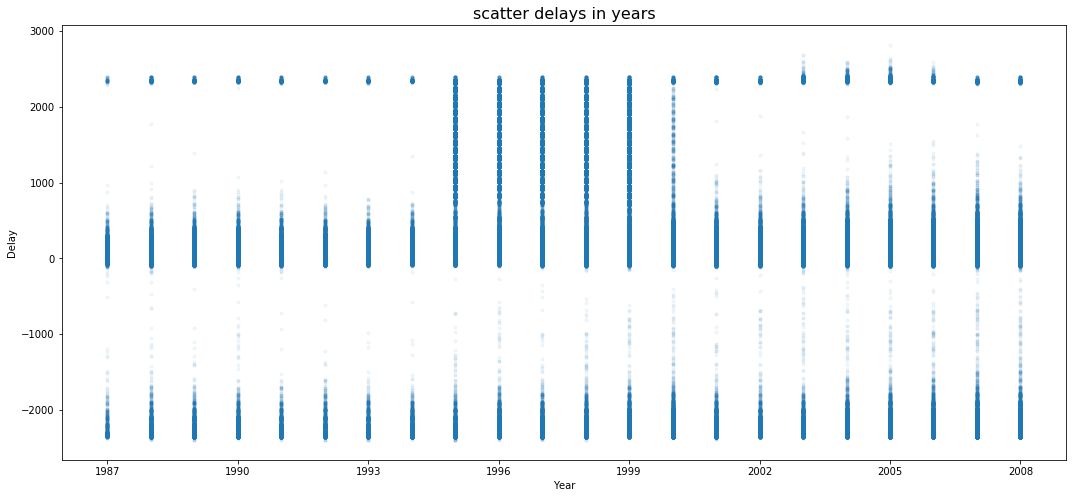

In [11]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(1987, 2009, 3) )
fig_info('Year', 'scatter delays in years', 16)
plt.ylabel('Delay')
plt.plot( 'Year', 'ArrDelay', "", data=act_df, linestyle='', marker='o', markersize=3, alpha=0.05)
plt.show()

> **In next figure**: This line plot support previous scatter plot that delays increase in interval 1995 to 1999

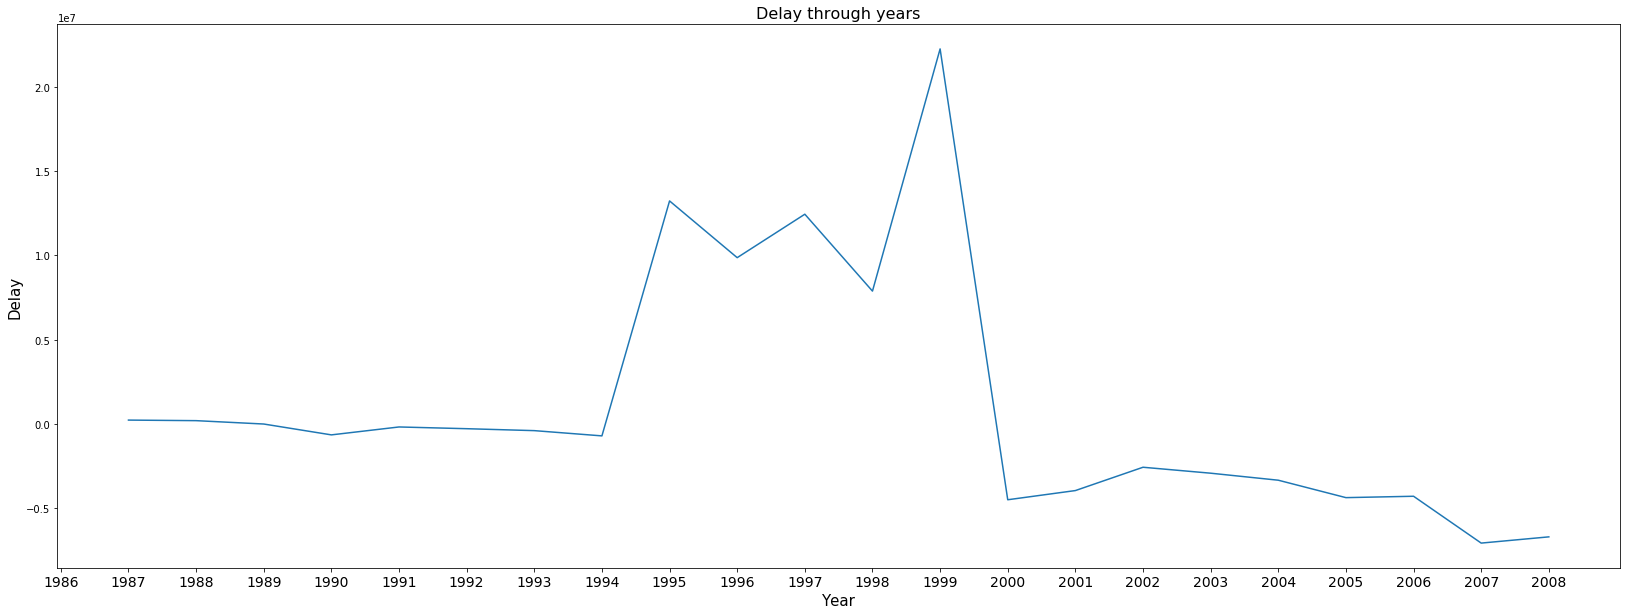

In [12]:
dataset = act_df.groupby('Year')['ArrDelay'].sum()
plt.figure(figsize=(28,10))
fig_info('Year', 'Delay through years', 16, 15)
plt.ylabel('Delay', fontsize = 15)
plt.xticks(np.arange(0, 2009, 1), fontsize= 14)

#plotting the graph
plt.plot(dataset)
plt.show()

In [13]:
# group data by Dest and Year
grp = act_df.groupby(['Dest','Year'])['ArrDelay'].sum()

In [14]:
# sort grouped data to get first & last Destinations
act_df.groupby('Dest')['ArrDelay'].sum().sort_values()

Dest
LAS    -2940951.0
MCO    -2170887.0
FLL    -1650504.0
EWR    -1402360.0
TPA    -1388295.0
PVD    -1228773.0
BWI    -1208677.0
LGA    -1030286.0
PBI    -1026172.0
RSW     -835842.0
BDL     -793928.0
ANC     -781660.0
SDF     -763556.0
PDX     -696090.0
JAX     -659339.0
ALB     -647636.0
MHT     -625668.0
SEA     -603814.0
CMH     -581242.0
RDU     -572526.0
BUF     -482224.0
TYS     -476637.0
DTW     -464341.0
ORF     -425331.0
PWM     -400025.0
SYR     -383432.0
ROC     -381708.0
RIC     -380676.0
MDW     -371556.0
OKC     -364166.0
          ...    
PSP      207950.0
RNO      214191.0
TUS      221182.0
JFK      231450.0
PHX      246540.0
MEM      250902.0
HNL      253354.0
PHL      253923.0
COS      254373.0
CVG      257164.0
PIT      334893.0
DAL      357724.0
ELP      367442.0
BUR      435775.0
SAN      730745.0
CLT      745781.0
BNA      784973.0
SJU      789266.0
DCA      804484.0
IAH      990177.0
SJC     1025402.0
STL     1124974.0
SNA     1182124.0
MIA     1942772.0
SFO  

In [15]:
#setup to show plots from pgal
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

> **In next figure**: This plot shows first five Destinations that record most earliest trips through years and last five Destinations that record most latest trips through years
>
> **Note: negative numbers for early trips**

>**Note: This is an interactive plot**


In [18]:
line_chart = pygal.Line()
line_chart.title = 'Destination delays(in minutes) through years '
line_chart.x_labels = map(str, range(1987, 2009))

#Destinations that records most earliest trips through years
line_chart.add('LAS', grp.loc['LAS',:].values)
line_chart.add('MCO', grp.loc['MCO',:].values)
line_chart.add('FLL', grp.loc['FLL',:].values)
line_chart.add('EWR', grp.loc['EWR',:].values)
line_chart.add('TPA', grp.loc['TPA',:].values)

#Destinations that records most latest trips through years
line_chart.add('ATL', grp.loc['ATL',:].values)
line_chart.add('LAX', grp.loc['LAX',:].values)
line_chart.add('DEN', grp.loc['DEN',:].values)
line_chart.add('EWR', grp.loc['EWR',:].values)
line_chart.add('TPA', grp.loc['TPA',:].values)

display(HTML(base_html.format(rendered_chart=line_chart.render(is_unicode=True))))

# Conclusion
> After finishing anlysis process, we will summary previous findings in next points:
>    
    - Most of the flights arrived on time
    - Delays increase between 1995 to 1999
    - ORD airport achevied first place for recorded flights
    - LAS airport recorded the most successful flights with almost no delays
  This dataset has some limitation for reasons of delay because this reasons not provided before 6/2003